<h1 style="text-align: center;">SpamShield - Spam Email Classifier</h1>

<h3 style="text-align: center;">Kaloyan Rakov</h3>

We all know how annoying spam emails can be, not only wasting our time but sometimes posing security risks. That’s why building a system to automatically classify emails as spam or not is both important and helpful. In this notebook, I will work on a spam email classifier system using machine learning algorithms.

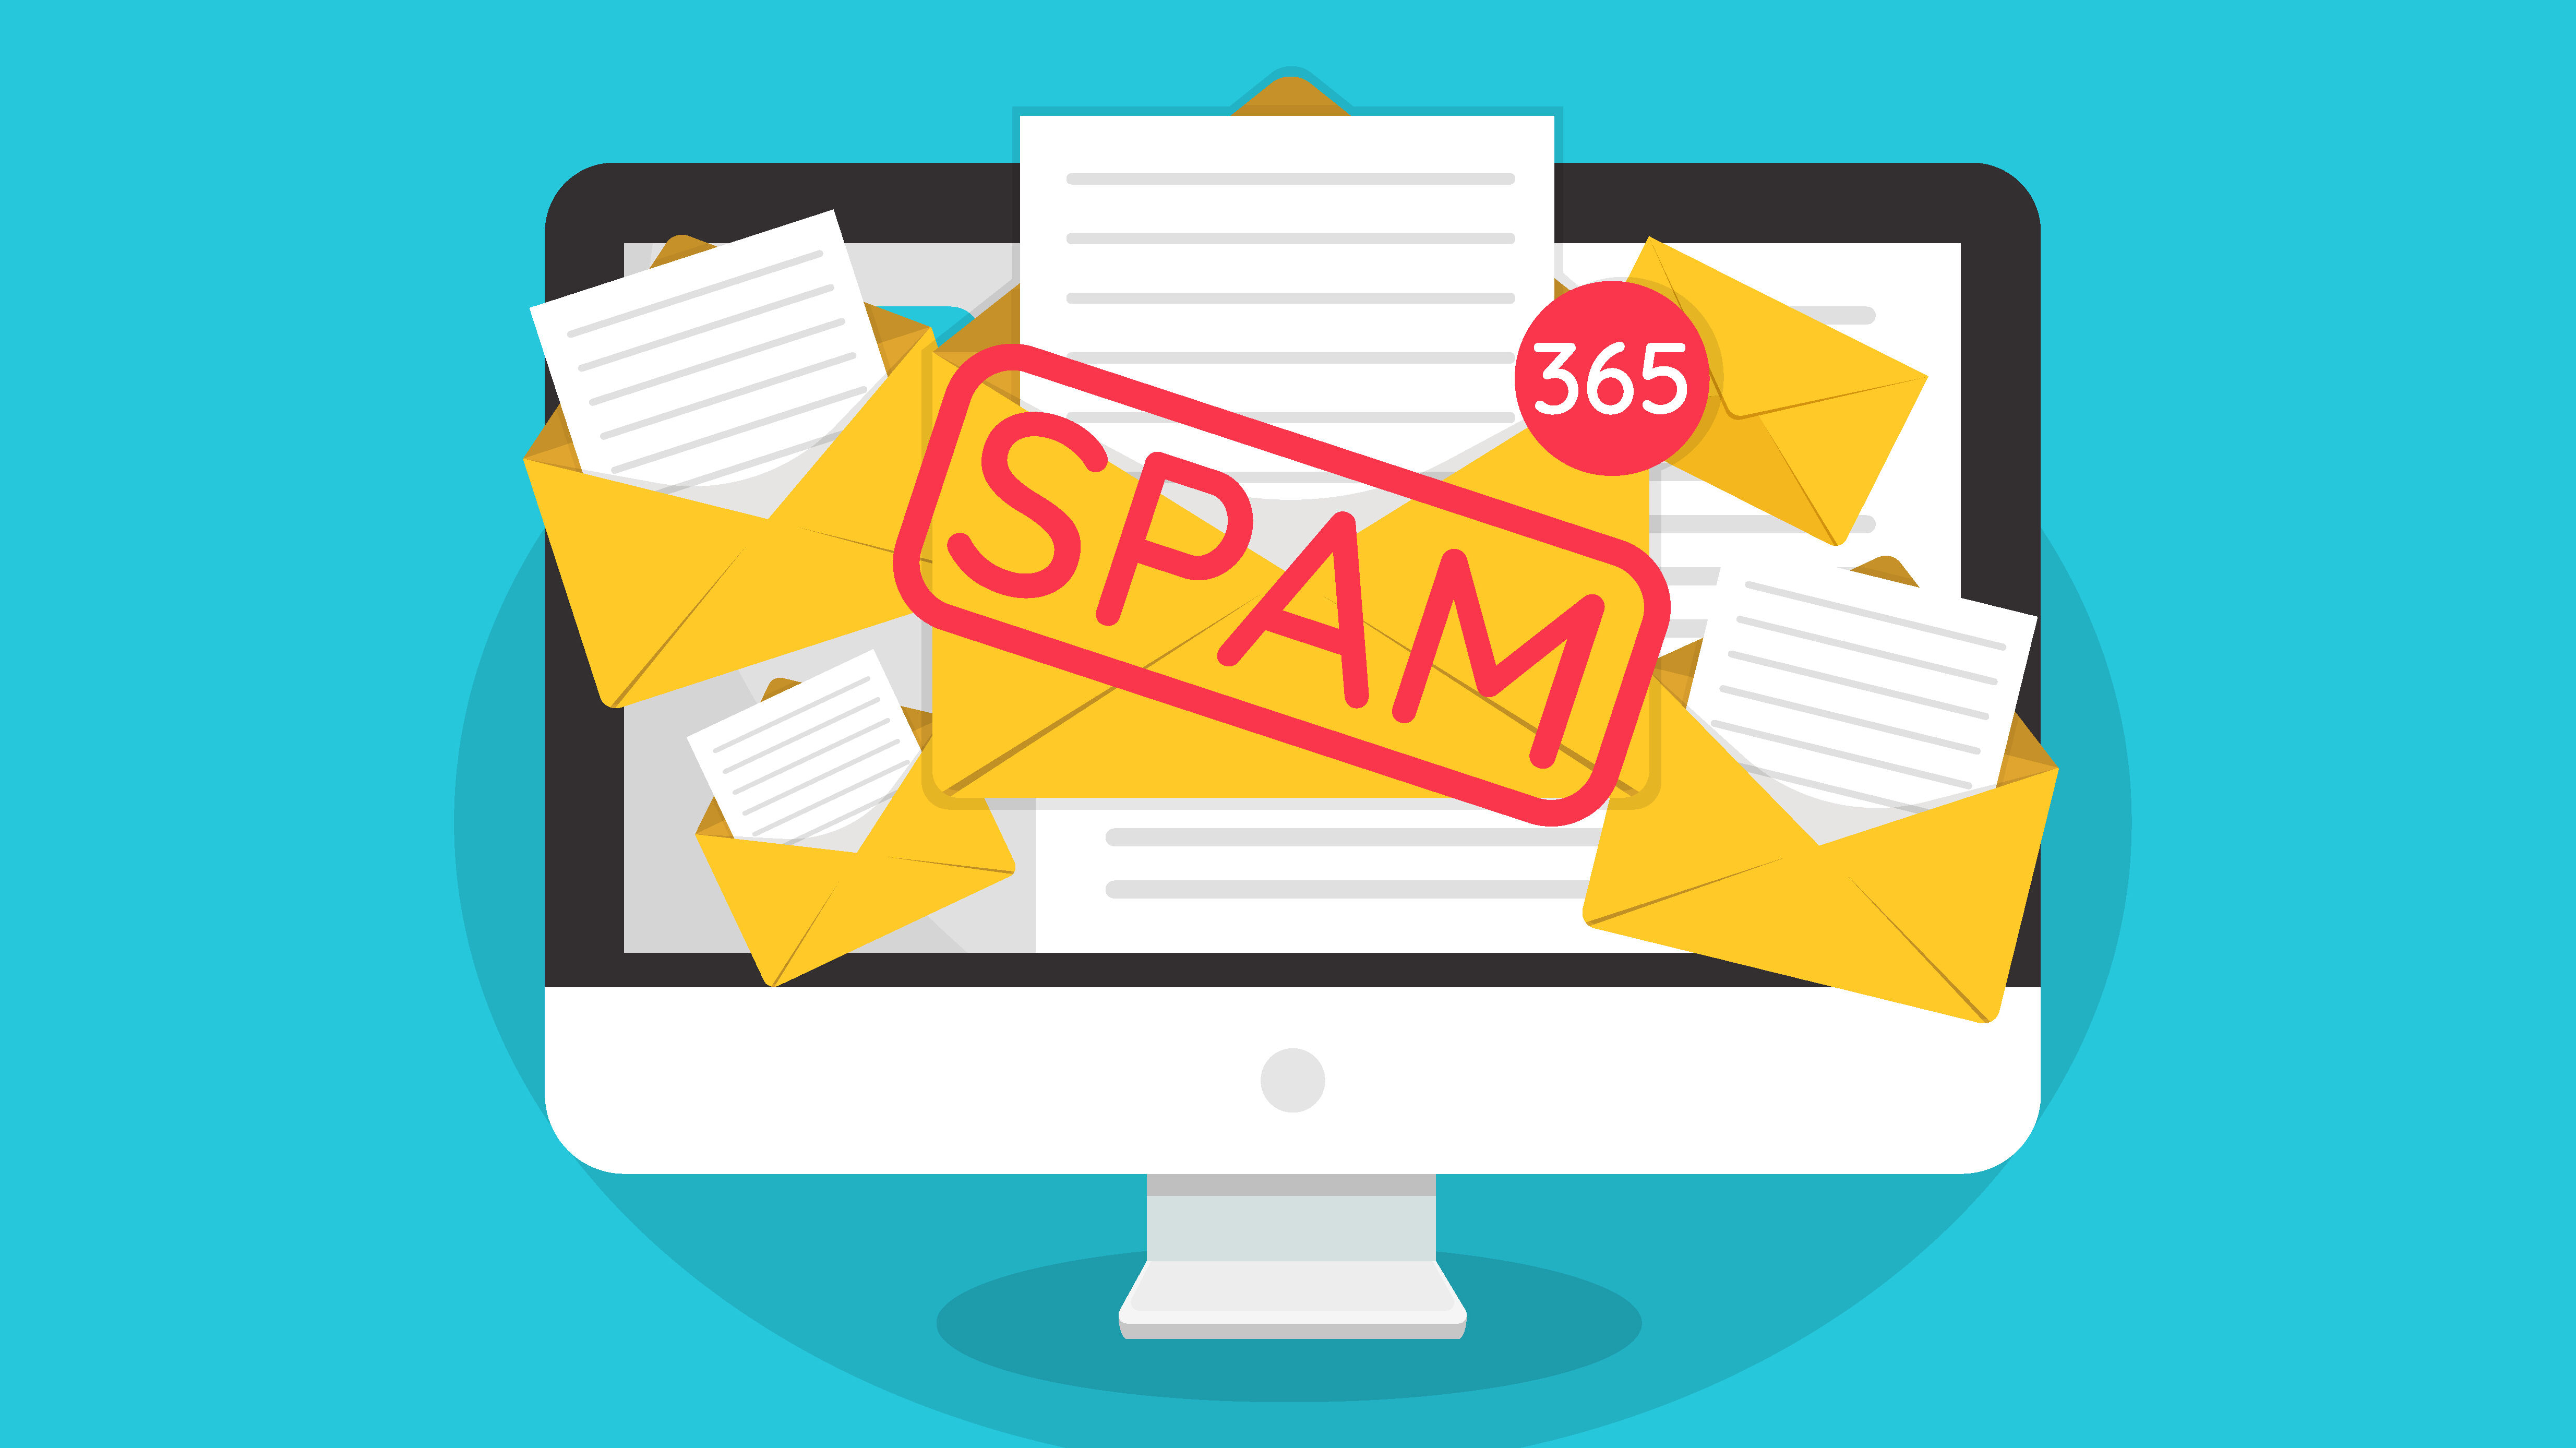

In [107]:
from IPython.display import Image
Image(filename='../Images/spam.jpg', width=1200)

# Data provisioning
What data are we working with:
I am going to be using a combination of two datasets:
1) The Ling-Spam Dataset: A collection of nearly 2900 emails from the Linguist List (https://linguistlist.org/). 
2) Enron Spam Dataset: A large set of real business emails (https://www2.aueb.gr/users/ion/data/enron-spam/).


The datasets were taken from Kaggle:

https://www.kaggle.com/datasets/mandygu/lingspam-dataset

https://www.kaggle.com/datasets/venky73/spam-mails-dataset/data

https://github.com/MWiechmann/enron_spam_data

# Data Sampling

Let's take a look at the first dataset:

In [108]:
import pandas as pd
df1 = pd.read_csv("../Datasets/Ling-Spam Dataset/messages.csv")
df1.head(15)

,subject,message,label
0,job posting - apple-iss research center,content - length : 3386 apple-iss research cen...,0
1,NaN,"lang classification grimes , joseph e . and ba...",0
2,query : letter frequencies for text identifica...,i am posting this inquiry for sergei atamas ( ...,0
3,risk,a colleague and i are researching the differin...,0
4,request book information,earlier this morning i was on the phone with a...,0
5,call for abstracts : optimality in syntactic t...,content - length : 4437 call for papers is the...,0
6,m . a . in scandinavian linguistics,m . a . in scandinavian linguistics at the uni...,0
7,call for papers : linguistics session of the m...,call for papers linguistics session - - midwes...,0
8,foreign language in commercials,content - length : 1937 greetings ! i ' m wond...,0
9,fulbright announcement : please post / dissemi...,fulbright announcement : please post / dissemi...,0


Let's take a look at the second dataset:

In [109]:
df2 = pd.read_csv("../Datasets/Spam Mails Dataset/spam_ham_dataset.csv")
df2.head(15)

,Unnamed: 0,label,text,label_num
0,605,ham,Subject: enron methanol ; meter # : 988291\r\n...,0
1,2349,ham,"Subject: hpl nom for january 9 , 2001\r\n( see...",0
2,3624,ham,"Subject: neon retreat\r\nho ho ho , we ' re ar...",0
3,4685,spam,"Subject: photoshop , windows , office . cheap ...",1
4,2030,ham,Subject: re : indian springs\r\nthis deal is t...,0
5,2949,ham,Subject: ehronline web address change\r\nthis ...,0
6,2793,ham,Subject: spring savings certificate - take 30 ...,0
7,4185,spam,Subject: looking for medication ? we ` re the ...,1
8,2641,ham,Subject: noms / actual flow for 2 / 26\r\nwe a...,0
9,1870,ham,"Subject: nominations for oct . 21 - 23 , 2000\...",0


# Processing

Let's do some light processing so we can combine the 2 datasets.

Dataset 1:
Firstly, I wanna take all the rows where the "subject" value is Nan and change it to (no subject). Secondly I wanna transform the 0 and 1 labels to words for easier understandability (1 = spam, 0 = not spam).

In [110]:
df1['subject'] = df1['subject'].fillna("(no subject)")
df1['label'] = df1['label'].map({0: "not spam", 1: "spam"})
df1.head(15)

,subject,message,label
0,job posting - apple-iss research center,content - length : 3386 apple-iss research cen...,not spam
1,(no subject),"lang classification grimes , joseph e . and ba...",not spam
2,query : letter frequencies for text identifica...,i am posting this inquiry for sergei atamas ( ...,not spam
3,risk,a colleague and i are researching the differin...,not spam
4,request book information,earlier this morning i was on the phone with a...,not spam
5,call for abstracts : optimality in syntactic t...,content - length : 4437 call for papers is the...,not spam
6,m . a . in scandinavian linguistics,m . a . in scandinavian linguistics at the uni...,not spam
7,call for papers : linguistics session of the m...,call for papers linguistics session - - midwes...,not spam
8,foreign language in commercials,content - length : 1937 greetings ! i ' m wond...,not spam
9,fulbright announcement : please post / dissemi...,fulbright announcement : please post / dissemi...,not spam


Dataset 2: 

In the second dataset we can see that there is a "Subject:" line in every mail. I want to exctract it and put it in it's own column to match the structure of the 1st dataset. I dropped some unneeded columns like label_num (we are going to use words for the labels) and the unnamed column (no info was provided for this column and it's values anywhere). Also, we are going to label the mails as "spam" or "not spam", not "spam" or "ham".

In [111]:
df2 = pd.read_csv("../Datasets/Spam Mails Dataset/spam_ham_dataset.csv")

def split_subject_message(text):
    if pd.isna(text):
        return pd.Series(["(no subject)", ""])
    lines = text.splitlines()
    if lines and lines[0].lower().startswith("subject:"):
        subject = lines[0][len("Subject:"):].strip()
        message = "\n".join(lines[1:]).strip()
        return pd.Series([subject, message])
    else:
        return pd.Series(["(no subject)", text.strip()])

df2[['subject', 'message']] = df2['text'].apply(split_subject_message)

df2.drop(columns=['text'], inplace=True)
df2 = df2[['subject', 'message', 'label']]
df2['label'] = df2['label'].map({'ham': 'not spam', 'spam': 'spam'})

df2.head(15)

,subject,message,label
0,enron methanol ; meter # : 988291,this is a follow up to the note i gave you on ...,not spam
1,"hpl nom for january 9 , 2001",( see attached file : hplnol 09 . xls )\n- hpl...,not spam
2,neon retreat,"ho ho ho , we ' re around to that most wonderf...",not spam
3,"photoshop , windows , office . cheap . main tr...",abasements darer prudently fortuitous undergon...,spam
4,re : indian springs,this deal is to book the teco pvr revenue . it...,not spam
5,ehronline web address change,this message is intended for ehronline users o...,not spam
6,spring savings certificate - take 30 % off,save 30 % when you use our customer appreciati...,not spam
7,looking for medication ? we ` re the best sour...,it is difficult to make our material condition...,spam
8,noms / actual flow for 2 / 26,we agree\n- - - - - - - - - - - - - - - - - - ...,not spam
9,"nominations for oct . 21 - 23 , 2000",( see attached file : hplnl 021 . xls )\n- hpl...,not spam


Now our 2 datasets follow the same structure, allowing us to combine them.
Combining the datasets:

In [112]:
combined_df = pd.concat([df1, df2], ignore_index=True)
combined_df.head(10)

,subject,message,label
0,job posting - apple-iss research center,content - length : 3386 apple-iss research cen...,not spam
1,(no subject),"lang classification grimes , joseph e . and ba...",not spam
2,query : letter frequencies for text identifica...,i am posting this inquiry for sergei atamas ( ...,not spam
3,risk,a colleague and i are researching the differin...,not spam
4,request book information,earlier this morning i was on the phone with a...,not spam
5,call for abstracts : optimality in syntactic t...,content - length : 4437 call for papers is the...,not spam
6,m . a . in scandinavian linguistics,m . a . in scandinavian linguistics at the uni...,not spam
7,call for papers : linguistics session of the m...,call for papers linguistics session - - midwes...,not spam
8,foreign language in commercials,content - length : 1937 greetings ! i ' m wond...,not spam
9,fulbright announcement : please post / dissemi...,fulbright announcement : please post / dissemi...,not spam


Having that data, we can extract more details about the emails: data like the length of the subject and message, number of words in the message, number of links, exclamation and question marks. These characteristics may help us in the analysis further down the line.

In [113]:
import re

def extract_features(row):
    message = row['message']
    subject = row['subject']
    
    normalized_msg = re.sub(r'\b(http|https)\s*:\s*/\s*/', r'\1://', message)
    normalized_msg = normalized_msg.replace(' . ', '.').replace(' .', '.').replace('. ', '.')
    num_words = len(message.split())
    num_sentences = message.count('.') + message.count('!') + message.count('?')

    num_links = len(re.findall(
        r'\b(?:https?://|www\.)\S+|\b\S+\.(com|net|org|info|biz|edu|gov)(/\S*)?', normalized_msg, re.IGNORECASE))

    num_exclam = message.count('!')
    num_quest = message.count('?')
    
    return pd.Series({
        "subject_length": len(subject),
        "message_length": len(message),
        "num_words": num_words,
        "num_sentences": num_sentences,
        "num_links": num_links,
        "num_exclam": num_exclam,
        "num_quest": num_quest,
    })

features = combined_df.apply(extract_features, axis=1)
combined_df = pd.concat([combined_df, features], axis=1)
combined_df.to_csv("../Datasets/combined_email_dataset.csv", index=False)
combined_df.head(10)

,subject,message,label,subject_length,message_length,num_words,num_sentences,num_links,num_exclam,num_quest
0,job posting - apple-iss research center,content - length : 3386 apple-iss research cen...,not spam,39,2856,584,21,0,0,0
1,(no subject),"lang classification grimes , joseph e . and ba...",not spam,12,1800,344,34,3,0,0
2,query : letter frequencies for text identifica...,i am posting this inquiry for sergei atamas ( ...,not spam,50,1435,280,18,2,1,0
3,risk,a colleague and i are researching the differin...,not spam,4,324,60,4,0,0,1
4,request book information,earlier this morning i was on the phone with a...,not spam,24,1046,232,11,1,1,2
5,call for abstracts : optimality in syntactic t...,content - length : 4437 call for papers is the...,not spam,51,4492,861,58,4,0,6
6,m . a . in scandinavian linguistics,m . a . in scandinavian linguistics at the uni...,not spam,35,2201,399,28,0,0,0
7,call for papers : linguistics session of the m...,call for papers linguistics session - - midwes...,not spam,52,802,150,11,1,0,1
8,foreign language in commercials,content - length : 1937 greetings ! i ' m wond...,not spam,31,1230,244,13,1,2,1
9,fulbright announcement : please post / dissemi...,fulbright announcement : please post / dissemi...,not spam,59,1478,279,18,1,0,0


Let's check if we have any empty values for the messages or subjects in the combined dataset:

In [114]:
nan_summary = combined_df[['subject', 'message']].isna().sum()
print(nan_summary)

subject    0
message    0
dtype: int64


We don't. Great, let's dive into the data itself.

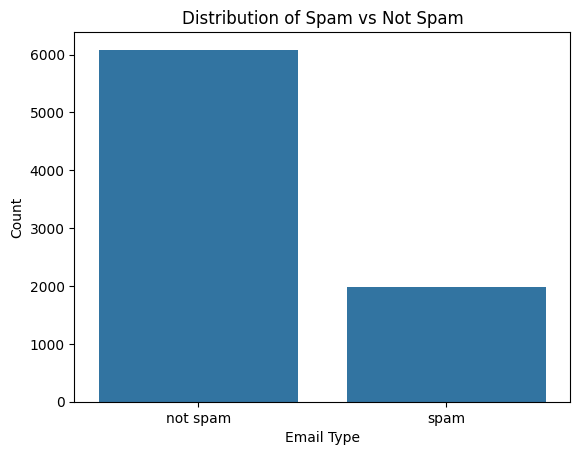

In [115]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.countplot(data=combined_df, x='label')
plt.title("Distribution of Spam vs Not Spam")
plt.xlabel("Email Type")
plt.ylabel("Count")
plt.show()

In [12]:
import pandas as pd
df3 = pd.read_csv("../Datasets/enron_spam_data/enron_spam_data.csv")
df3.head(15)


,Message ID,Subject,Message,Spam/Ham,Date
0,0,christmas tree farm pictures,NaN,ham,1999-12-10
1,1,"vastar resources , inc .","gary , production from the high island larger ...",ham,1999-12-13
2,2,calpine daily gas nomination,- calpine daily gas nomination 1 . doc,ham,1999-12-14
3,3,re : issue,fyi - see note below - already done .\nstella\...,ham,1999-12-14
4,4,meter 7268 nov allocation,fyi .\n- - - - - - - - - - - - - - - - - - - -...,ham,1999-12-14
5,5,mcmullen gas for 11 / 99,"jackie ,\nsince the inlet to 3 river plant is ...",ham,1999-12-14
6,6,meter 1517 - jan 1999,"george ,\ni need the following done :\njan 13\...",ham,1999-12-14
7,7,duns number changes,fyi\n- - - - - - - - - - - - - - - - - - - - -...,ham,1999-12-14
8,8,king ranch,there are two fields of gas that i am having d...,ham,1999-12-14
9,9,re : entex transistion,thanks so much for the memo . i would like to ...,ham,1999-12-14


In [ ]:
spam_only_df = df3[df3['Spam/Ham'].str.lower() == 'spam']
spam_only_df.head(15)

,Message ID,Subject,Message,Spam/Ham,Date
3672,3672,dobmeos with hgh my energy level has gone up !...,introducing\ndoctor - formulated\nhgh\nhuman g...,spam,2003-12-18
3673,3673,your prescription is ready . . oxwq s f e,"low cost prescription medications\nsoma , ultr...",spam,2003-12-18
3674,3674,get that new car 8434,people nowthe weather or climate in any partic...,spam,2003-12-18
3675,3675,await your response,"dear partner ,\nwe are a team of government of...",spam,2003-12-18
3676,3676,"coca cola , mbna america , nascar partner with...",stock\nprofile\nabout\ncompany\ninvestment\nhi...,spam,2003-12-18
3677,3677,emerging small cap,to exit all additional mailings - - - >\n[ pre...,spam,2003-12-19
3678,3678,re : patchs work better then pillz,worlds first dermal p ; atch technology for p ...,spam,2003-12-19
3679,3679,paliourg udtih 7 wcwknoanopkt,good morning paliourg !\nlast miraculous and i...,spam,2003-12-19
3680,3680,real products for real people . b,dont waste your time at the doctors office !\n...,spam,2003-12-20
3681,3681,"^ . pe , nis s ^ ize mat ; ters ! yhvqbvdboevkcd",briababhdpr frdjvdbesk cdpizacqjkufx hfkosxcym...,spam,2003-12-20


In [16]:
spam_only_df = df3[df3['Spam/Ham'].str.lower() == 'spam']
spam_only_df = spam_only_df.dropna(subset=['Subject', 'Message'])
spam_only_df = spam_only_df[['Subject', 'Message', 'Spam/Ham']]
spam_only_df = spam_only_df.rename(columns={'Spam/Ham': 'label'})
spam_only_df = spam_only_df.reset_index(drop=True)
spam_only_df.head(15)


,Subject,Message,label
0,dobmeos with hgh my energy level has gone up !...,introducing\ndoctor - formulated\nhgh\nhuman g...,spam
1,your prescription is ready . . oxwq s f e,"low cost prescription medications\nsoma , ultr...",spam
2,get that new car 8434,people nowthe weather or climate in any partic...,spam
3,await your response,"dear partner ,\nwe are a team of government of...",spam
4,"coca cola , mbna america , nascar partner with...",stock\nprofile\nabout\ncompany\ninvestment\nhi...,spam
5,emerging small cap,to exit all additional mailings - - - >\n[ pre...,spam
6,re : patchs work better then pillz,worlds first dermal p ; atch technology for p ...,spam
7,paliourg udtih 7 wcwknoanopkt,good morning paliourg !\nlast miraculous and i...,spam
8,real products for real people . b,dont waste your time at the doctors office !\n...,spam
9,"^ . pe , nis s ^ ize mat ; ters ! yhvqbvdboevkcd",briababhdpr frdjvdbesk cdpizacqjkufx hfkosxcym...,spam


In [17]:
print(len(spam_only_df))

16614


In [22]:
# 1. Randomly sample 4000 spam emails
sampled_spam = spam_only_df.sample(n=4000, random_state=42)
combined_df = pd.read_csv("../Datasets/combined_email_dataset.csv")

combined_df = pd.concat([combined_df, sampled_spam], ignore_index=True)

combined_df = combined_df.sample(frac=1, random_state=42).reset_index(drop=True)

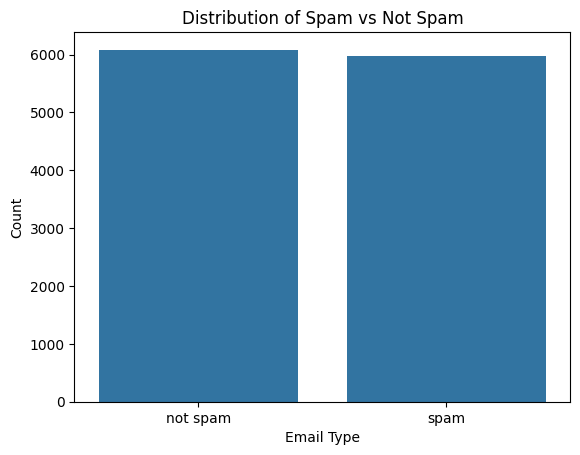

In [25]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.countplot(data=combined_df, x='label')
plt.title("Distribution of Spam vs Not Spam")
plt.xlabel("Email Type")
plt.ylabel("Count")
plt.show()

Now we have an equal dataset, so the scales are not tipped in favour of the Not Spam emails.

----------------------

# Data Visualisation

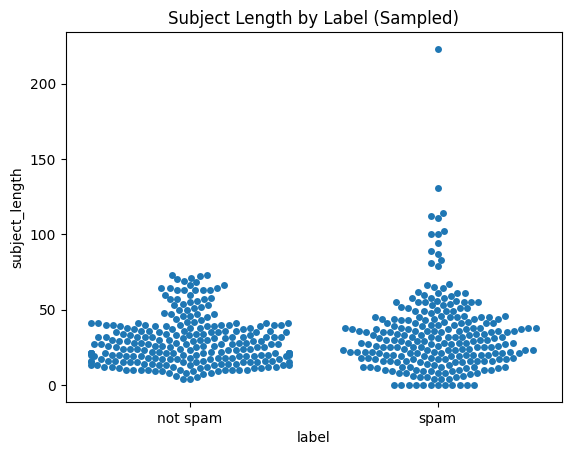

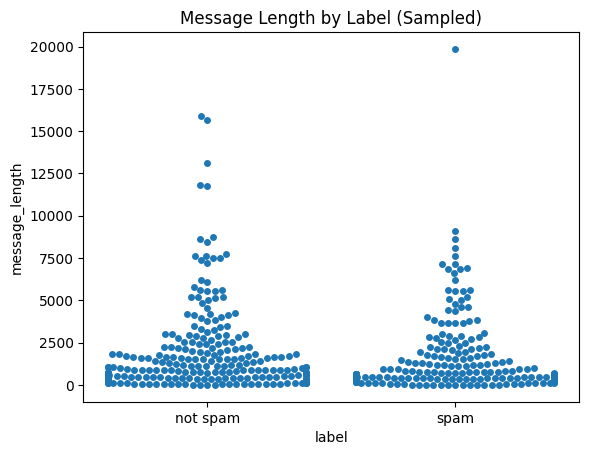

In [117]:
# Subject Length
sns.swarmplot(data=balanced_df.sample(500), x='label', y='subject_length')
plt.title("Subject Length by Label (Sampled)")
plt.show()

# Message Length
sns.swarmplot(data=balanced_df.sample(500), x='label', y='message_length')
plt.title("Message Length by Label (Sampled)")
plt.show()


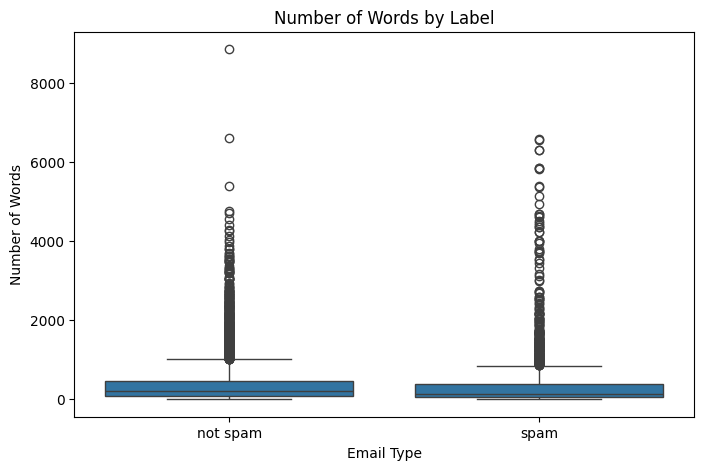

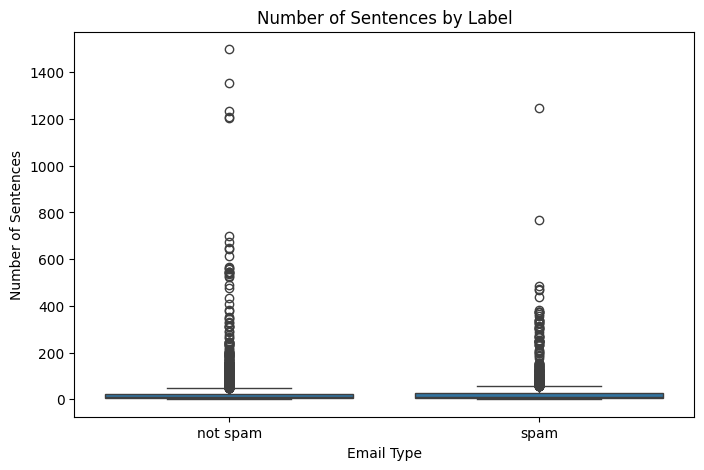

In [122]:
import seaborn as sns
import matplotlib.pyplot as plt

# Boxplot: Number of Words by Label
plt.figure(figsize=(8, 5))
sns.boxplot(data=combined_df, x='label', y='num_words')
plt.title("Number of Words by Label")
plt.xlabel("Email Type")
plt.ylabel("Number of Words")
plt.show()

# Boxplot: Number of Sentences by Label
plt.figure(figsize=(8, 5))
sns.boxplot(data=combined_df, x='label', y='num_sentences')
plt.title("Number of Sentences by Label")
plt.xlabel("Email Type")
plt.ylabel("Number of Sentences")
plt.show()


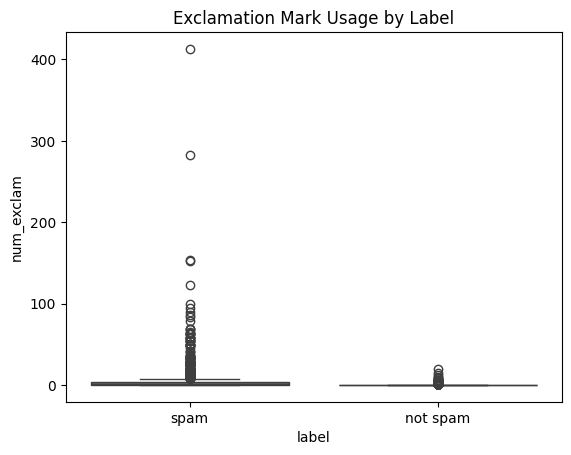

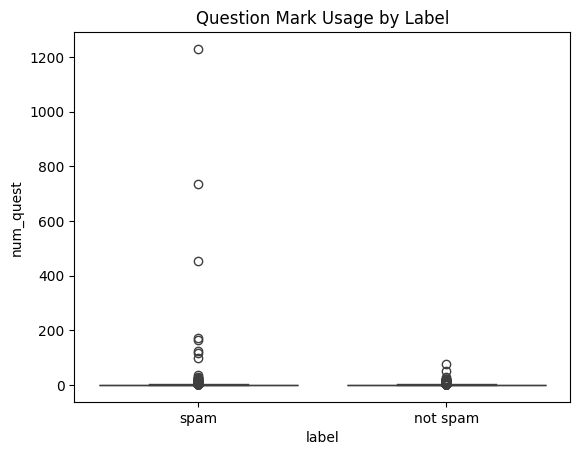

In [118]:
# Exclamation marks
sns.boxplot(data=balanced_df, x='label', y='num_exclam')
plt.title("Exclamation Mark Usage by Label")
plt.show()

# Question marks
sns.boxplot(data=balanced_df, x='label', y='num_quest')
plt.title("Question Mark Usage by Label")
plt.show()

As we can see, overusing the exclamation and question marks is a sign of the mails being spam. A lot of spam mails are advertisements, trying to get our attention, which explains the unnatural level of those signs in the messages.

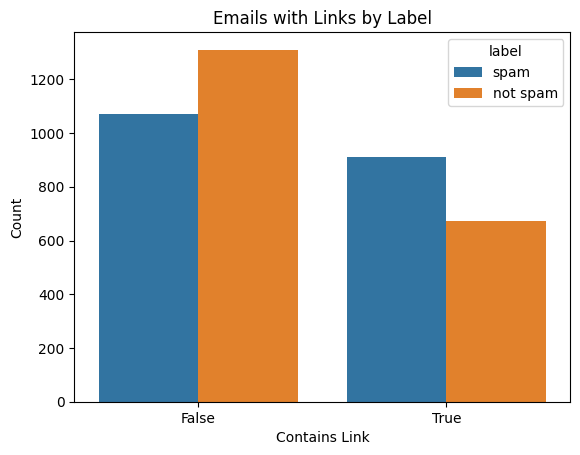

In [119]:
balanced_df['has_links'] = balanced_df['num_links'] > 0
sns.countplot(data=balanced_df, x='has_links', hue='label')
plt.title("Emails with Links by Label")
plt.xlabel("Contains Link")
plt.ylabel("Count")
plt.show()


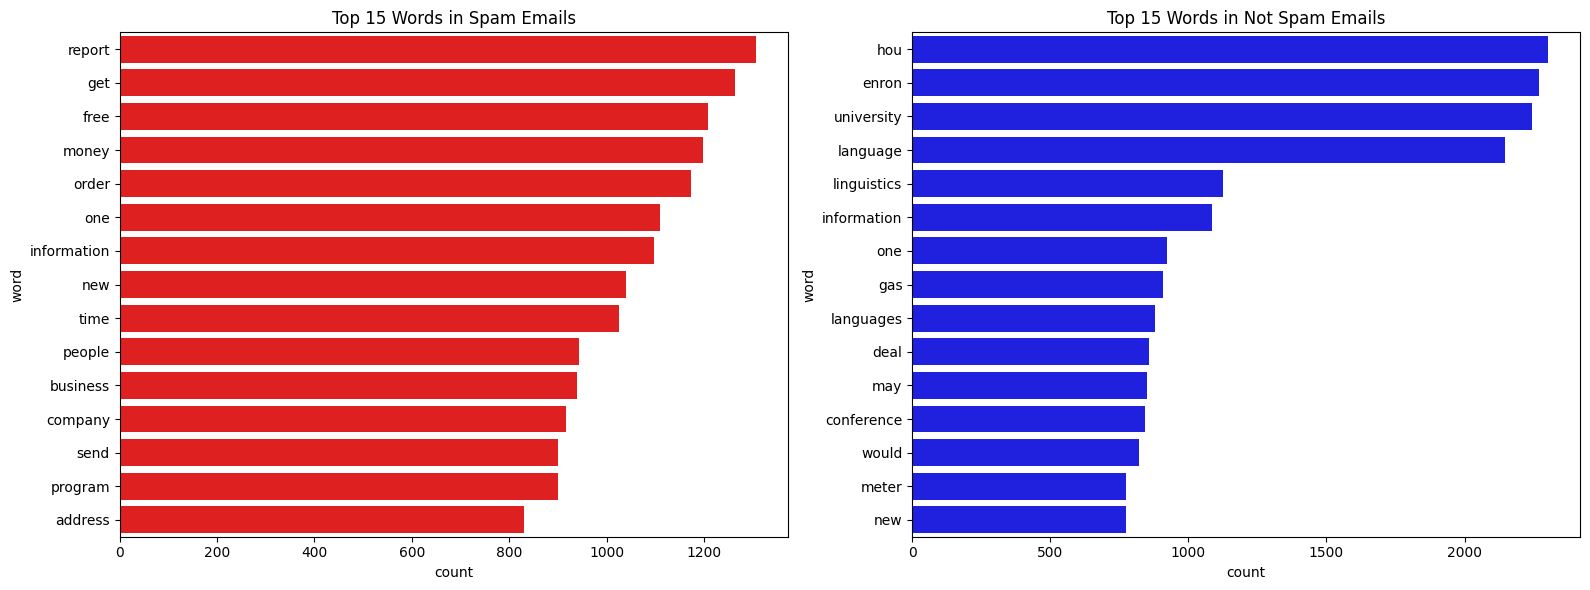

In [120]:
import warnings
warnings.filterwarnings("ignore")

from collections import Counter
import nltk
from nltk.corpus import stopwords
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import re

nltk.download('stopwords', quiet=True)
stop_words = set(stopwords.words('english'))

# Add custom stopwords
custom_stopwords = {'http', 'https', 'com', 'www', 'subject', 'click', 'email', 'please', 'mail', 'ect', 'make'}
stop_words.update(custom_stopwords)

def clean_and_tokenize(text):
    words = re.findall(r'\b[a-z]{3,}\b', text.lower())
    return [word for word in words if word not in stop_words]

spam_tokens = clean_and_tokenize(" ".join(balanced_df[balanced_df['label'] == 'spam']['message']))
not_spam_tokens = clean_and_tokenize(" ".join(balanced_df[balanced_df['label'] == 'not spam']['message']))

spam_freq = Counter(spam_tokens)
not_spam_freq = Counter(not_spam_tokens)

top_spam = pd.DataFrame(spam_freq.most_common(15), columns=['word', 'count'])
top_not_spam = pd.DataFrame(not_spam_freq.most_common(15), columns=['word', 'count'])

fig, axes = plt.subplots(1, 2, figsize=(16, 6))
sns.barplot(data=top_spam, x='count', y='word', ax=axes[0], color="red")
axes[0].set_title("Top 15 Words in Spam Emails")

sns.barplot(data=top_not_spam, x='count', y='word', ax=axes[1], color="blue")
axes[1].set_title("Top 15 Words in Not Spam Emails")

plt.tight_layout()
plt.show()


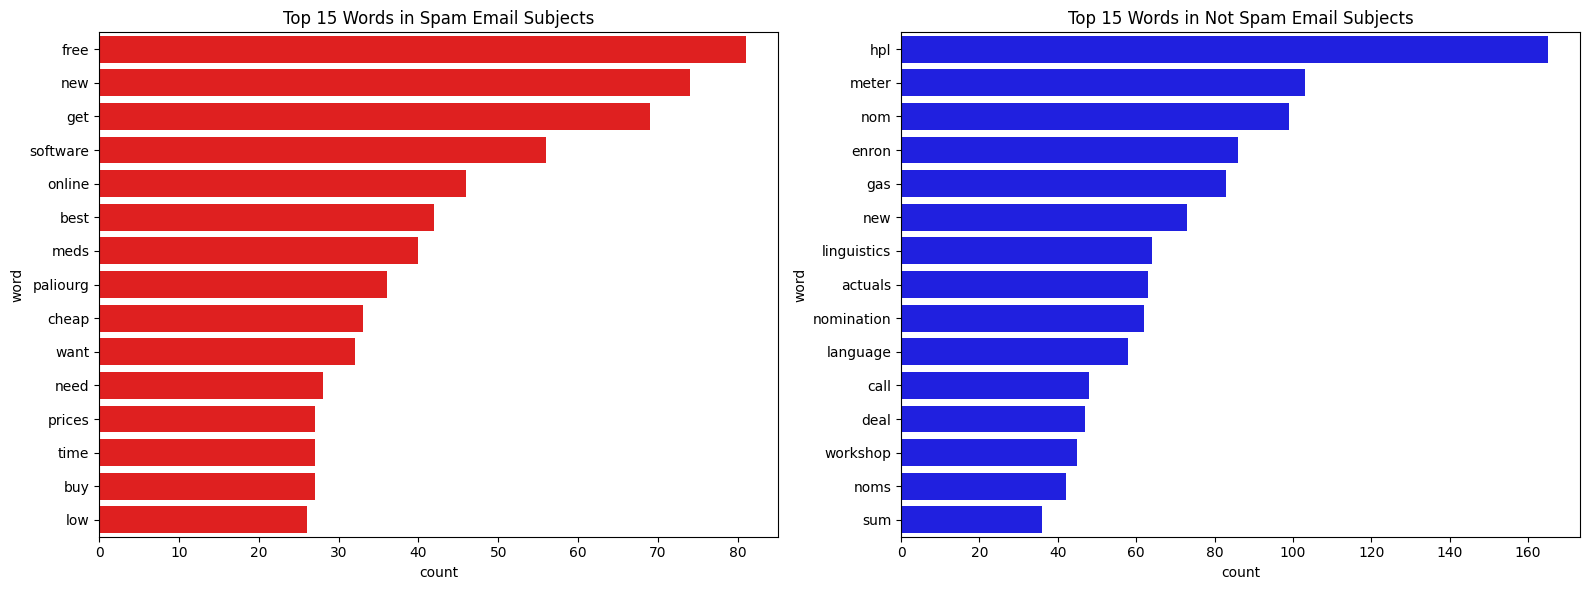

In [121]:
spam_subject_tokens = clean_and_tokenize(" ".join(balanced_df[balanced_df['label'] == 'spam']['subject']))
not_spam_subject_tokens = clean_and_tokenize(" ".join(balanced_df[balanced_df['label'] == 'not spam']['subject']))

spam_subject_freq = Counter(spam_subject_tokens)
not_spam_subject_freq = Counter(not_spam_subject_tokens)

top_spam_subjects = pd.DataFrame(spam_subject_freq.most_common(15), columns=['word', 'count'])
top_not_spam_subjects = pd.DataFrame(not_spam_subject_freq.most_common(15), columns=['word', 'count'])

fig, axes = plt.subplots(1, 2, figsize=(16, 6))
sns.barplot(data=top_spam_subjects, x='count', y='word', ax=axes[0], color="red")
axes[0].set_title("Top 15 Words in Spam Email Subjects")

sns.barplot(data=top_not_spam_subjects, x='count', y='word', ax=axes[1], color="blue")
axes[1].set_title("Top 15 Words in Not Spam Email Subjects")

plt.tight_layout()
plt.show()
